In [1180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [1181]:
df=pd.read_csv("Dataset of Diabetes .csv")
df.head(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


**Dataset info**

In [1182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


**Handling Missing Values**

In [1183]:
df.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

**Handling Duplicate Values**

In [1184]:
df.duplicated().sum()

np.int64(0)

**Dataset Structure**

In [1185]:
df.shape

(1000, 14)

In [1186]:
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [1187]:
df.head(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [1188]:
#Dropping Columns For Better Readability
df.drop(columns=["ID","No_Pation"],inplace=True)
df.head(5)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [1189]:
# Strip leading/trailing spaces and convert to uppercase
df['CLASS'] = df['CLASS'].str.strip().str.upper()


In [1190]:
print(df['CLASS'].unique())         # should now be ['N', 'P', 'Y']
print(df['CLASS'].value_counts())   # accurate counts for each class


['N' 'P' 'Y']
CLASS
Y    844
N    103
P     53
Name: count, dtype: int64


**Classification anad Visualization of Non Diabetic, Pre Diabetic and Diabetic Patients**

In [1191]:
classifi_diabetic=df["CLASS"].value_counts().reset_index()
classifi_diabetic.style.background_gradient(cmap="Blues")
#N= Non Diabetic, P=Pre Diabetic, Y=Diabetic


,CLASS,count
0,Y,844
1,N,103
2,P,53


**Visualization**

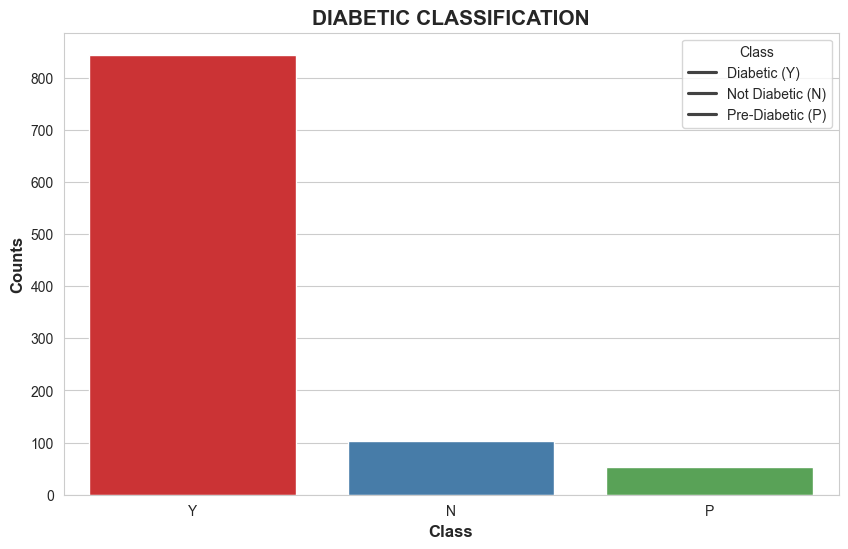

In [1192]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_diabetic,x="CLASS",y="count",hue="CLASS",palette="Set1")
plt.xlabel("Class",fontweight="bold",fontsize=12)
plt.ylabel("Counts",fontweight="bold",fontsize=12)
plt.title("DIABETIC CLASSIFICATION",fontweight="bold",fontsize=15)
plt.legend(
    title="Class",
    labels=["Diabetic (Y)", "Not Diabetic (N)", "Pre-Diabetic (P)"]
)
plt.show()

In [1193]:
df.head(5)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [1194]:

df["Gender"]=df["Gender"].str.strip().str.upper()
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [1195]:
df["Gender"]=df["Gender"].replace({"M":0,"F":1})
df.head(5)

C:\Users\user\AppData\Local\Temp\ipykernel_760\1712781492.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"]=df["Gender"].replace({"M":0,"F":1})


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [1196]:
df["CLASS"]=df["CLASS"].astype("category") #Changing the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  1000 non-null   int64   
 1   AGE     1000 non-null   int64   
 2   Urea    1000 non-null   float64 
 3   Cr      1000 non-null   int64   
 4   HbA1c   1000 non-null   float64 
 5   Chol    1000 non-null   float64 
 6   TG      1000 non-null   float64 
 7   HDL     1000 non-null   float64 
 8   LDL     1000 non-null   float64 
 9   VLDL    1000 non-null   float64 
 10  BMI     1000 non-null   float64 
 11  CLASS   1000 non-null   category
dtypes: category(1), float64(8), int64(3)
memory usage: 87.2 KB


In [1197]:
df['CLASS_CODE'] = df['CLASS'].cat.codes #cat.codes will assign each category a numeric value: 'N' → 0, 'P' → 1, 'Y' → 2


In [1198]:
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,CLASS_CODE
0,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0
1,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,0
2,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0
3,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0
4,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,0


In [1199]:
df.columns

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'CLASS', 'CLASS_CODE'],
      dtype='object')

In [1200]:
#Report Classification 
repo_classifi=df.groupby("Gender")[[ 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']].sum().reset_index()
print(repo_classifi)

   Gender      Urea     Cr    HbA1c     Chol       TG     HDL      LDL  \
0       0  3064.643  43556  4667.10  2705.72  1363.71  638.10  1504.68   
1       1  2060.100  25387  3614.06  2157.10   985.90  566.65  1105.11   

     VLDL       BMI  
0  1400.3  16888.86  
1   454.4  12689.16  


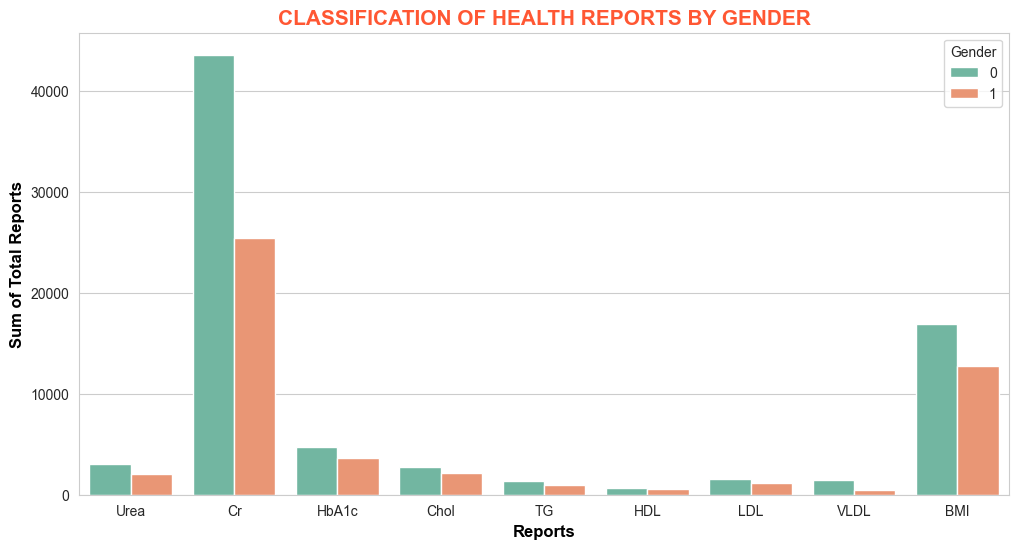

In [1201]:
repo_melted=repo_classifi.melt(
    id_vars="Gender",
    value_vars=['Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI'],
    var_name="Reports",
    value_name="sum"

)
plt.figure(figsize=(12,6))
barplot=sns.barplot(data=repo_melted,x="Reports",y="sum",hue="Gender",palette="Set2")
plt.xlabel("Reports",fontweight="bold",fontsize=12,color="black")
plt.ylabel("Sum of Total Reports",fontweight="bold",fontsize=12,color="black")
plt.title("CLASSIFICATION OF HEALTH REPORTS BY GENDER",fontweight="bold",fontsize=15,color="#FF5733")
plt.show()

**Alternate Heatmap Visualization For Better Understanding**

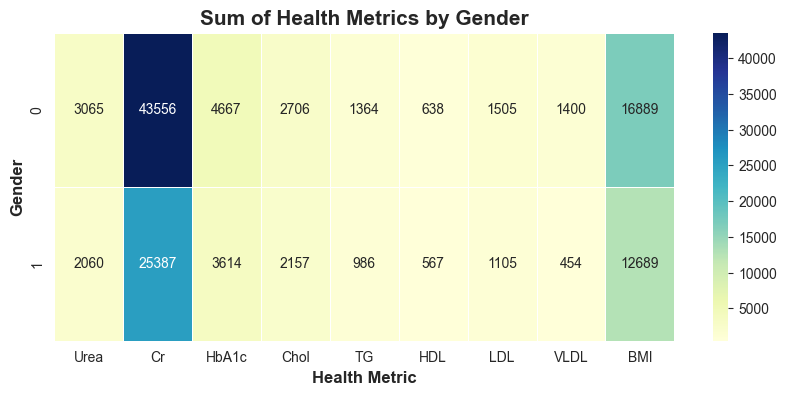

In [1202]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Gender as the index for the heatmap
repo_classifi.set_index("Gender", inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(repo_classifi, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

# Customize the plot
plt.title("Sum of Health Metrics by Gender", fontweight="bold", fontsize=15)
plt.xlabel("Health Metric", fontweight="bold", fontsize=12)
plt.ylabel("Gender", fontweight="bold", fontsize=12)

# Show the plot
plt.show()

In [1203]:
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,CLASS_CODE
0,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0
1,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,0
2,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0
3,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0
4,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,0


**Machine Learning**

In [1204]:
#Preparing Features and Target
x=df.drop(columns=["CLASS","CLASS_CODE"])
y=df["CLASS_CODE"]

In [1205]:
#Scaler Feature
Scaler=StandardScaler()
x_scaled=Scaler.fit_transform(x)


In [1206]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)


In [1207]:
#train model 
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [1208]:
#Predict and Evaluate
y_pred=model.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))
print("Accuracy Score:\n", accuracy_score(y_test,y_pred))

Confusion Matrix:
 [[ 20   0   1]
 [  0   6   0]
 [  1   0 172]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00         6
           2       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200

Accuracy Score:
 0.99


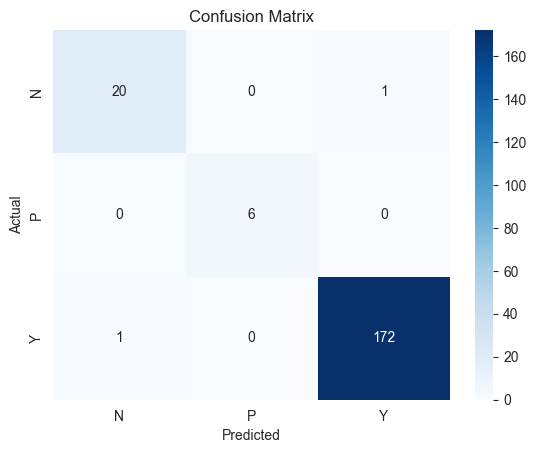

In [1209]:
#Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test,y_pred),fmt="d",annot=True, 
            xticklabels=df['CLASS'].cat.categories,
            yticklabels=df['CLASS'].cat.categories, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


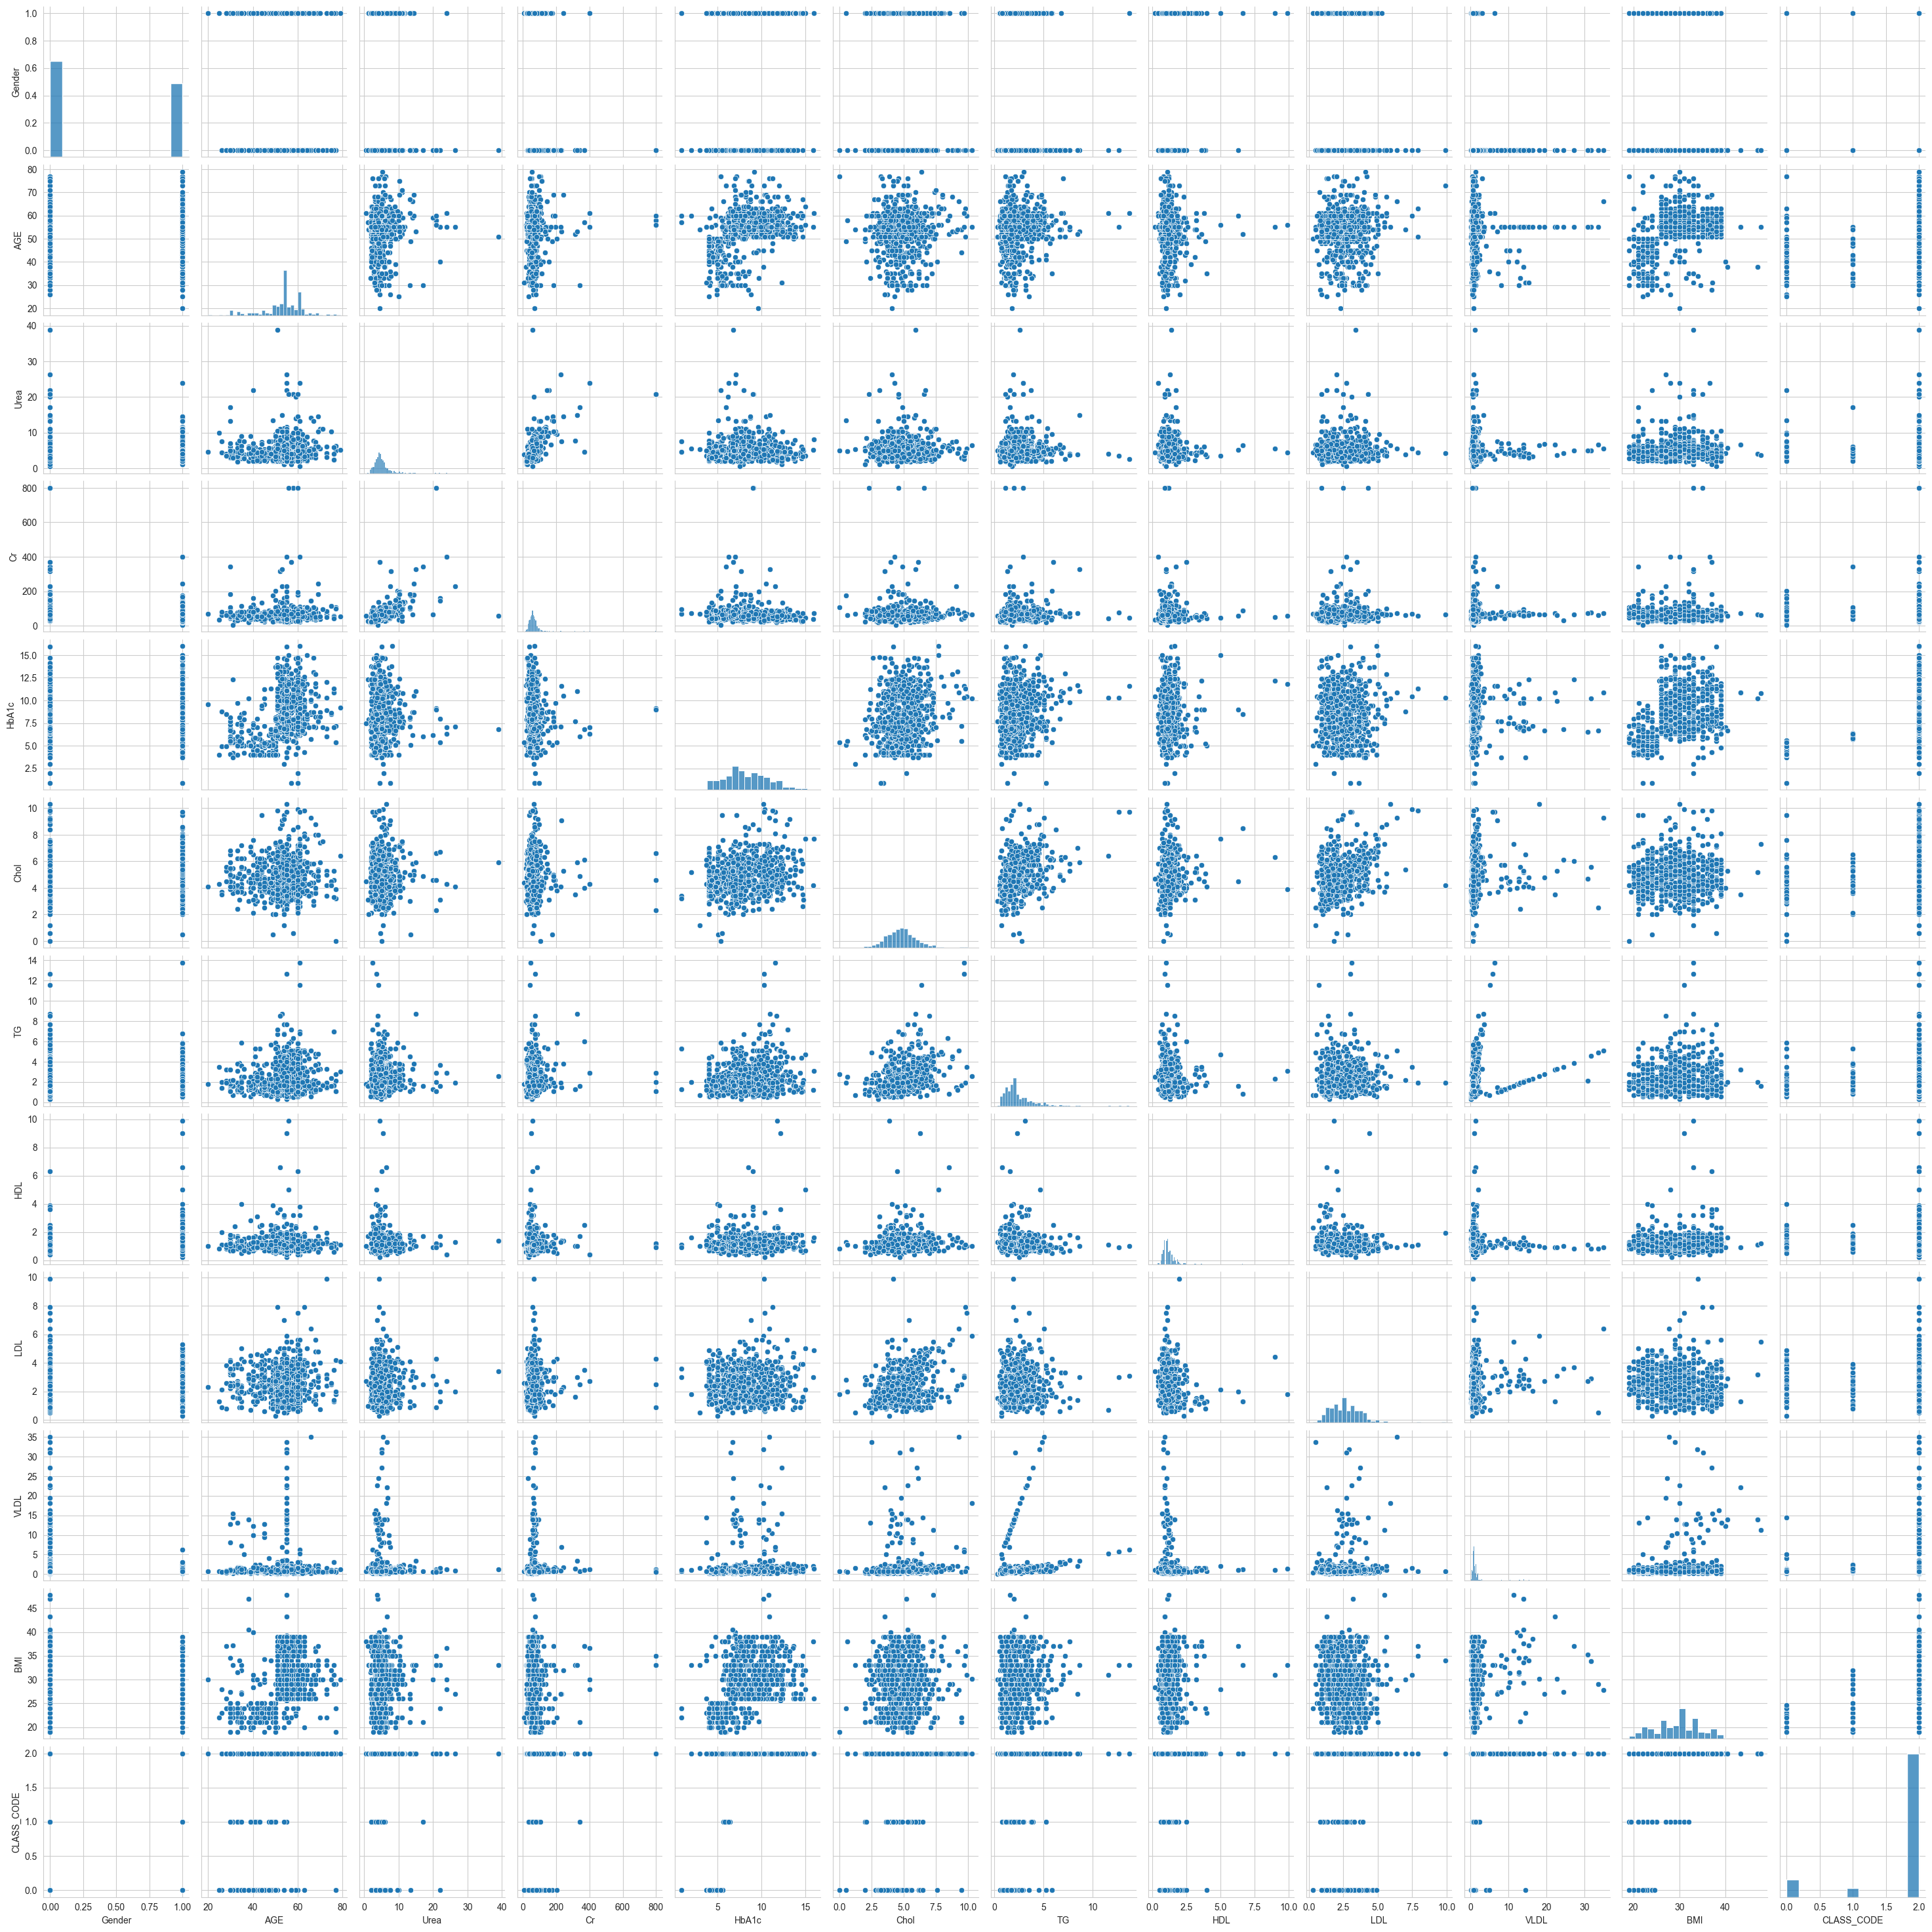

In [1210]:
# Visualization by pair plot
sns.pairplot(df)
plt.show()

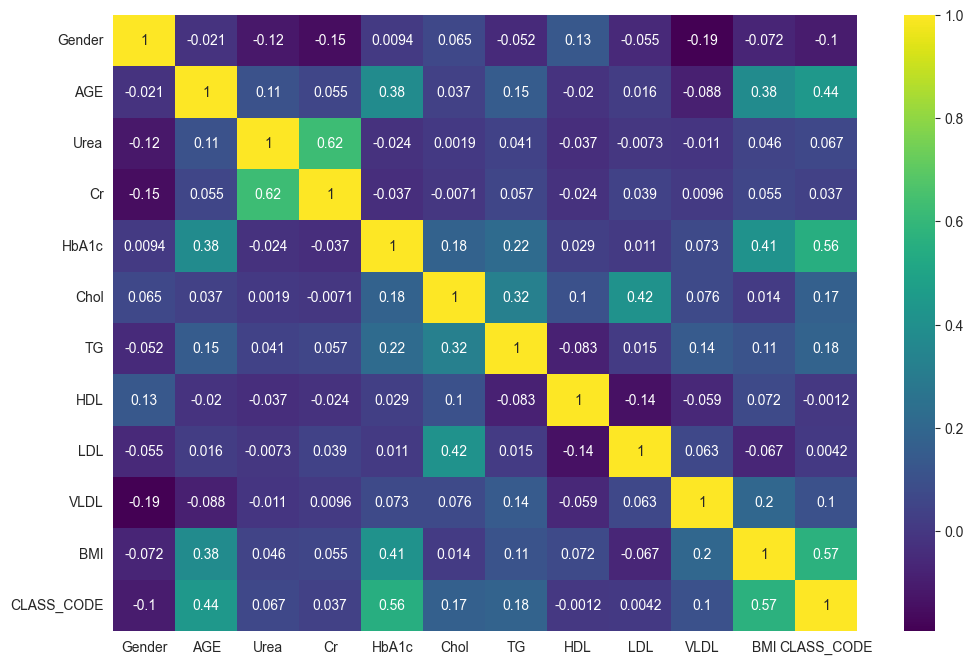

In [1211]:
#Correlation Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="viridis")
plt.show()